In [85]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler

from tqdm import tqdm

from umap import UMAP

In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [87]:
# low_memory=False because it has 26 columns with mixed types
df = pd.read_csv("../Data/train.csv", low_memory=False)
# remove redundant features
df.drop(columns=['ID', 'Name', 'SSN'], inplace=True)
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [88]:
tmp = pd.read_csv('../Data/train_preprocessed_type_of_loan.csv')
tmp['Customer_ID'] = df['Customer_ID']

tmp.isna().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      7738
Changed_Credit_Limit        2091
Num_Credit_Inquiries        3615
Credit_Mix                  3392
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     8784
Payment_Behaviour           7600
Monthly_Balance             1209
Credit_Score                   0
Customer_ID                    0
dtype: int64

In [89]:
nan_feature = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit', 
               'Num_Credit_Inquiries', 'Amount_invested_monthly', 
               'Payment_Behaviour', 'Monthly_Balance'] #'Credit_Mix'

In [90]:
cat = tmp.select_dtypes('object').columns

cat_nan = [feature for feature in nan_feature if feature in cat]
num_nan = [feature for feature in nan_feature if feature not in cat]

cat_nan, num_nan

(['Payment_Behaviour'],
 ['Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Num_Credit_Inquiries',
  'Amount_invested_monthly',
  'Monthly_Balance'])

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from imblearn.pipeline import Pipeline 

cat_preprocessor = Pipeline([("imputer", SimpleImputer(strategy="most_frequent"))])

num_preprocessor = Pipeline([
                            ("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer([
    ("numerical", num_preprocessor, num_nan), 
    ("categorical", cat_preprocessor, cat_nan) 
])

In [92]:
mask = df.Customer_ID == customers[60]
df.loc[mask, 'Credit_Mix':]

,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
480,Bad,4834.59,38.165546,10 Years and 2 Months,NM,78.418272,69.78240332874385,Low_spent_Small_value_payments,287.71265845270665,Standard
481,_,4834.59,29.044638,10 Years and 3 Months,Yes,78.418272,35.921667815767655,High_spent_Small_value_payments,291.57339396568284,Poor
482,_,4834.59,26.784280,NaN,Yes,78.418272,NaN,Low_spent_Medium_value_payments,236.99911711869146,Poor
483,Bad,4834.59,35.050139,10 Years and 5 Months,Yes,78.418272,69.46880383867259,Low_spent_Medium_value_payments,278.0262579427779,Poor
484,_,4834.59,34.313476,10 Years and 6 Months,Yes,78.418272,__10000__,Low_spent_Small_value_payments,239.4320793078569,Poor
485,_,4834.59,38.977745,10 Years and 7 Months,NM,78.418272,42.4353362039956,High_spent_Small_value_payments,285.05972557745486,Standard
486,_,4834.59,32.418925,10 Years and 8 Months,Yes,78.418272,130.8351969498678,Low_spent_Large_value_payments,206.65986483158264,Poor
487,Bad,4834.59,30.813295,10 Years and 9 Months,Yes,78.418272,171.6398273191018,Low_spent_Small_value_payments,185.85523446234862,Poor


In [93]:
customers = tmp.Customer_ID.unique()

for customer in tqdm(customers):
    mask = tmp.Customer_ID == customer
    tmp.loc[mask, num_nan + cat_nan] = preprocessor.fit_transform(tmp[mask])


100%|██████████| 12500/12500 [02:57<00:00, 70.54it/s]


In [97]:
tmp.to_csv('../Data/train_final.csv', index=False)

In [94]:
mask = df.Customer_ID == customers[60]
df.loc[mask, num_nan + ['Credit_Mix']]

,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Amount_invested_monthly,Monthly_Balance,Credit_Mix
480,NaN,23.58,12.0,69.78240332874385,287.71265845270665,Bad
481,21,23.58,12.0,35.921667815767655,291.57339396568284,_
482,21,23.58,12.0,NaN,236.99911711869146,_
483,21,23.58,NaN,69.46880383867259,278.0262579427779,Bad
484,21,23.58,12.0,__10000__,239.4320793078569,_
485,19,23.58,12.0,42.4353362039956,285.05972557745486,_
486,23,23.58,12.0,130.8351969498678,206.65986483158264,_
487,21,23.58,12.0,171.6398273191018,185.85523446234862,Bad


In [95]:
tmp.isna().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  3392
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Customer_ID                    0
dtype: int64

In [ ]:
preprocessor.fit_transform(X_train)

In [49]:
tmp.isna().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      9952
Changed_Credit_Limit        3408
Num_Credit_Inquiries        7264
Credit_Mix                  3392
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     6728
Payment_Behaviour           3024
Monthly_Balance              840
Credit_Score                   0
Customer_ID                    0
dtype: int64

In [27]:
df.select_dtypes(include=["object"]).columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
features_tmp = ['Age','Annual_Income', 'Num_Bank_Accounts', 'Occupation',
                'Num_Credit_Card', 'Num_of_Loan', 'Interest_Rate',
                'Outstanding_Debt', 'Total_EMI_per_month', 'Credit_Mix']

for feature in features_tmp:
    tmp = df[['Customer_ID',
               feature]].groupby('Customer_ID')[feature].apply(mode)
    df[feature] = df['Customer_ID'].map(tmp.to_dict())

In [3]:
# low_memory=False because it has 26 columns with mixed types
df1 = pd.read_csv("../Data/test.csv", low_memory=False)
# remove redundant features
df1.drop(columns=['ID', 'Name', 'SSN'], inplace=True)
df1.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,CUS_0xd40,September,23,Scientist,19114.12,1824.843333,3,4,3,4,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,CUS_0xd40,October,24,Scientist,19114.12,1824.843333,3,4,3,4,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,CUS_0xd40,November,24,Scientist,19114.12,1824.843333,3,4,3,4,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,CUS_0xd40,December,24_,Scientist,19114.12,NaN,3,4,3,4,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,CUS_0x21b1,September,28,_______,34847.84,3037.986667,2,4,6,1,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [15]:
df[df.Customer_ID.isin(df1.Customer_ID)]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,CUS_0x942c,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [24]:
df[['Customer_ID', 'Age', 'Occupation']].merge(df1[['Customer_ID']], how='outer', suffixes=('train_', 'test_'))

,Customer_ID,Age,Occupation
0,CUS_0xd40,23,Scientist
1,CUS_0xd40,23,Scientist
2,CUS_0xd40,23,Scientist
3,CUS_0xd40,23,Scientist
4,CUS_0xd40,23,Scientist
...,...,...,...
399995,CUS_0x942c,25,Mechanic
399996,CUS_0x942c,25,Mechanic
399997,CUS_0x942c,25,Mechanic
399998,CUS_0x942c,25,Mechanic


In [6]:
df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [4]:
df1.isna().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [71]:
file = 'train_preprocessed_type_of_loan.csv'

df = pd.read_csv("../Data/" + file, low_memory=False)

In [72]:
def features(df, Not_specified, A_OH):
    tmp = df.copy()
    if Not_specified:
        if A_OH:
            uniq_types = tmp['Type_of_Loan'].value_counts()[:10].index
            for uniq_type in uniq_types:
                tmp[uniq_type] = tmp['Type_of_Loan'].str.count(uniq_type)
            
            features_num = list(tmp.select_dtypes(include=["number"]).columns[-10:])
            features_obj = list(tmp.select_dtypes(include=["object"]).columns)
            
            features_cat = features_num + features_obj
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
            
            tmp.drop(columns='Type_of_Loan', inplace=True)
            features_cat.remove('Type_of_Loan')
        else:
            features_cat = list(tmp.select_dtypes(include=["object"]).columns)
            
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
    else:
        tmp.loc[tmp['Type_of_Loan'].str.contains('Not Specified'),
                'Type_of_Loan'] = None
        
        if A_OH:
            uniq_types = tmp['Type_of_Loan'].value_counts()[:9].index
            for uniq_type in uniq_types:
                tmp[uniq_type] = tmp['Type_of_Loan'].str.count(uniq_type)
            
            features_num = list(tmp.select_dtypes(include=["number"]).columns[-9:])
            features_obj = list(tmp.select_dtypes(include=["object"]).columns)
            
            features_cat = features_num + features_obj
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
                
            tmp.drop(columns='Type_of_Loan', inplace=True)
            features_cat.remove('Type_of_Loan')
        else:
            features_cat = list(tmp.select_dtypes(include=["object"]).columns)
            
            for cat in features_cat:
                tmp[cat] = tmp[cat].astype('category')
    
    features_num = list(set(tmp.drop(columns='Credit_Score').columns) - set(features_cat))
    return tmp, features_num, features_cat   

In [73]:
def data_splitting(df, cat, num, nan=False):
    tmp = (nan*[df] + (1-nan)*[df.dropna().reset_index(drop=True)])[0].copy()
    
    return train_test_split(tmp[num + cat], 
                            tmp['Credit_Score'], test_size=0.2, shuffle=True)


def data_resampler(X_train, y_train, enable=False):
    sampler = RandomOverSampler()
    X_train, y_train = enable*sampler.fit_resample(X_train, y_train) + \
                       (1-enable)*(X_train, y_train)
    return X_train, y_train

In [74]:
def table(df, model='SGD'):
    """m: miss
       s: sampling
       a: aug_OH
       n: not_spec
    """
    
    from itertools import product
    from time import time
    from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
    
    conditions = [[0, 1]]*4
    products = list(product(*conditions))
    n, m = len(products), 14
    result = np.zeros((n, m))
    
    for i, conds in tqdm(enumerate(products)):
        m, s, a, n = conds
        tmp, num, cat = features(df, n, a)
        X_train, X_test, y_train, y_test = data_splitting(tmp, cat, num, m)
        X_train, y_train = data_resampler(X_train, y_train, s)
        
        cat_preprocessor = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                    ("onehot", OneHotEncoder(sparse=True, handle_unknown="ignore"))])

        num_preprocessor = Pipeline([
                                    ("imputer", SimpleImputer(strategy="median"))])

        preprocessor = ColumnTransformer([
            ("numerical", num_preprocessor, num),
            ("categorical", cat_preprocessor, cat)
        ])

        tic = time()
        ## Transforming
        X_train = preprocessor.fit_transform(X_train)
        #X_val = preprocessor.transform(X_val)
        X_test = preprocessor.transform(X_test)

        scaler = MaxAbsScaler()
        try:
            X_train = scaler.fit_transform(X_train).toarray()
            #X_val = scaler.transform(X_val).toarray()
            X_test = scaler.transform(X_test).toarray()
        except:
            X_train = scaler.fit_transform(X_train)
            #X_val = scaler.transform(X_val)
            X_test = scaler.transform(X_test) 
            
        svc = SGDClassifier(loss="hinge", n_jobs=10, validation_fraction=0.25)
        svc.fit(X_train, y_train)
        toc = time() - tic
                    
        f1_train = f1_score(y_train, svc.predict(X_train), average=None)
        acc_train = accuracy_score(y_train, svc.predict(X_train))
        f1_test = f1_score(y_test, svc.predict(X_test), average=None)
        acc_test = accuracy_score(y_test, svc.predict(X_test))        
        
        result[i,:] = *conds, *f1_train, acc_train, *f1_test, acc_test, toc, tmp.size


    cols = ['m', 's', 'a', 'n', 'F1_1_train', 'F1_2_train', 'F1_3_train', 'Train',
            'F1_1_test', 'F1_2_test', 'F1_3_test', 'Test', 'Comp_Time', 'Size']            
    return pd.DataFrame(result, columns=cols).sort_values(by='Test', ascending=False).reset_index(drop=True)

In [75]:
#res = table(df)

In [95]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

m, s, a, n = (1, 0, 0, 1)
tmp, num, cat = features(df, n, a)
X_train, X_test, y_train, y_test = data_splitting(tmp, cat, num, m)
X_train, y_train = data_resampler(X_train, y_train, s)

cat_preprocessor = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                            ("onehot", OneHotEncoder(sparse=True, handle_unknown="ignore"))])

num_preprocessor = Pipeline([
                            ("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer([
    ("numerical", num_preprocessor, num),
    ("categorical", cat_preprocessor, cat)
])

## Transforming
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

scaler = MaxAbsScaler()
try:
    X_train = scaler.fit_transform(X_train).toarray()
    X_test = scaler.transform(X_test).toarray()
except:
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)     
    
svc = SGDClassifier(loss="log_loss", n_jobs=10, validation_fraction=0.25)
svc.fit(X_train, y_train)       

y_hat = svc.predict(X_train)
            
f1_train = f1_score(svc.predict(X_train), y_train, average=None)
acc_train = accuracy_score(svc.predict(X_train), y_train)
f1_test = f1_score(svc.predict(X_test), y_test, average=None)
acc_test = accuracy_score(svc.predict(X_test), y_test)

In [77]:
def purity(X_train):    
    from sklearn.svm import SVC
    from sklearn.metrics import precision_score
    reducer = UMAP(15)
    embedding = reducer.fit_transform(X_train)
    svc = SVC().fit(embedding, y_train)
    y_hat = svc.predict(embedding)

    res = precision_score(y_true=y_train.to_numpy(), y_pred=y_hat, average=None)



'''plt.figure(figsize=(7, 7))
scatter = plt.scatter(embedding[:, 0],embedding[:, 1],  s=1, c=y_train)
plt.xlabel('UMAP feature 0')
plt.ylabel('UMAP feature 1')
plt.title('UMAP projection')
legend1 = plt.legend(*scatter.legend_elements(),
                     title="Classes")'''

'plt.figure(figsize=(7, 7))\nscatter = plt.scatter(embedding[:, 0],embedding[:, 1],  s=1, c=y_train)\nplt.xlabel(\'UMAP feature 0\')\nplt.ylabel(\'UMAP feature 1\')\nplt.title(\'UMAP projection\')\nlegend1 = plt.legend(*scatter.legend_elements(),\n                     title="Classes")'

In [78]:
comb = [(0,0,0,0), (0,0,0,1),
        (0,0,1,0), (0,0,1,1), 
        (1,0,0,0), (1,0,0,1), 
        (1,0,1,0), (1,0,1,1)]

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print(classification_report(svc.predict(X_train), y_train))

              precision    recall  f1-score   support

           0       0.73      0.61      0.66     25881
           1       0.17      0.68      0.28      5538
           2       0.87      0.57      0.69     33051

    accuracy                           0.59     64470
   macro avg       0.59      0.62      0.54     64470
weighted avg       0.76      0.59      0.64     64470



In [10]:
type(svc).__name__

'SGDClassifier'

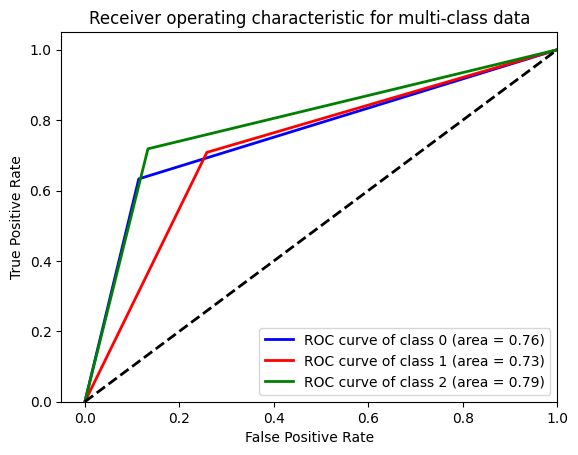

In [99]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

y, t = label_binarize(y_hat, classes=[0, 1, 2]), label_binarize(y_train, classes=[0, 1, 2])
n_classes = y.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(t[:, i], y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [100]:
fpr

{0: array([0.        , 0.11406462, 1.        ]),
 1: array([0.        , 0.25820021, 1.        ]),
 2: array([0.        , 0.13346726, 1.        ])}

In [119]:
from scipy.stats import hmean

a = pd.read_csv("../Results/Purity.csv")

a['Purity'] = hmean(a.iloc[:, -3:], axis=1)
a.sort_values(by='Purity')

,m,s,a,n,Purity_0,Purity_1,Purity_2,Purity
12,1.0,1.0,0.0,0.0,0.483737,0.522378,0.578869,0.525480
5,0.0,1.0,0.0,1.0,0.511215,0.548822,0.565586,0.540903
14,1.0,1.0,1.0,0.0,0.519500,0.557819,0.558899,0.544775
6,0.0,1.0,1.0,0.0,0.522939,0.574485,0.541619,0.545526
4,0.0,1.0,0.0,0.0,0.507873,0.569192,0.565618,0.546065
15,1.0,1.0,1.0,1.0,0.534689,0.568904,0.542345,0.548260
7,0.0,1.0,1.0,1.0,0.513359,0.581250,0.578844,0.555971
13,1.0,1.0,0.0,1.0,0.543817,0.550530,0.609307,0.566413
8,1.0,0.0,0.0,0.0,0.602530,0.686984,0.490054,0.581858
11,1.0,0.0,1.0,1.0,0.605293,0.692129,0.493657,0.585639
